In [259]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [260]:
application_df=pd.read_csv('understanding.csv')

In [261]:

# application_df=application_df[0:100000]

In [262]:
application_df.shape

(601117, 5)

In [263]:
application_df.dtypes

Hostname         object
Application      object
octets            int64
Timestamp        object
octets(kbps)    float64
dtype: object

In [264]:
# application_df['Application']=application_df['Application'].astype(str)

In [265]:
application_df.isnull().sum()

Hostname        0
Application     0
octets          0
Timestamp       0
octets(kbps)    0
dtype: int64

In [266]:
application_df.head()

,Hostname,Application,octets,Timestamp,octets(kbps)
0,vdevice-host-name,dns,999321,2019-01-18 08:50:12,121.987427
1,vdevice-host-name,firefox_update,135582,2019-01-18 08:50:12,16.550537
2,vdevice-host-name,google_gen,999692,2019-01-18 08:50:12,122.032715
3,vdevice-host-name,https,14039837,2019-01-18 08:50:12,1713.847290
4,vdevice-host-name,mozilla,961326,2019-01-18 08:50:12,117.349365


In [267]:
top_application=application_df['Application'].value_counts()[:10,]

In [268]:
gk = application_df.groupby(['Application','octets(kbps)']) 

In [269]:
att=application_df.groupby("Application")["octets(kbps)"].sum().reset_index()
#att=att.sort_values(by='octets(kbps)',ascending=False)[:10]

In [270]:
att

,Application,octets(kbps)
0,adobe,1.302832e+06
1,advertising_com,1.820181e+05
2,akamai,1.639179e+05
3,amazon,8.676636e+05
4,aol_one,3.105570e+05
5,appnexus,1.161354e+04
6,atlassolutions,8.386841e+04
7,bidswitch,2.940668e+04
8,bing,1.217660e+05
9,bootstrapcdn,9.892227e+04


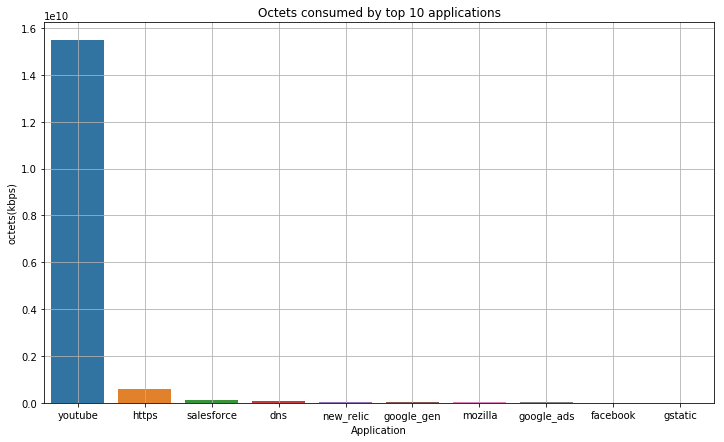

In [271]:
att=application_df.groupby("Application")["octets(kbps)"].sum().reset_index()
att=att.sort_values(by='octets(kbps)',ascending=False)[:10]

plt.figure(figsize=(12,7))
sns.barplot(att['Application'],att['octets(kbps)'],linewidth=1)
plt.grid(True)
plt.title('Octets consumed by top 10 applications')
plt.show()

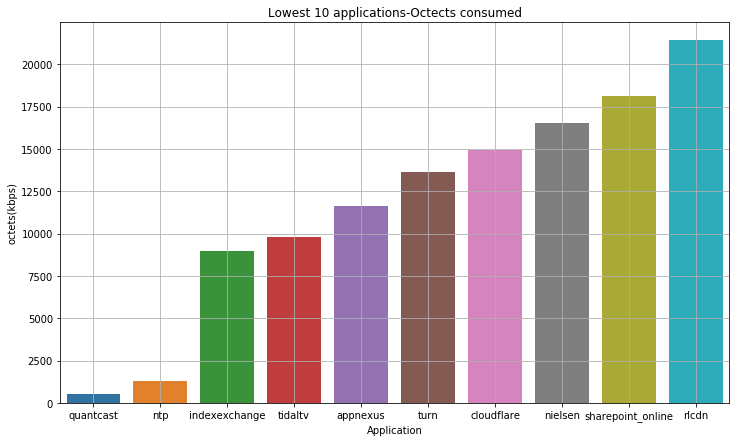

In [272]:
att=application_df.groupby("Application")["octets(kbps)"].sum().reset_index()
att=att.sort_values(by='octets(kbps)',ascending=True)[:10]

plt.figure(figsize=(12,7))
sns.barplot(att['Application'],att['octets(kbps)'],linewidth=1)
plt.grid(True)
plt.title('Lowest 10 applications-Octects consumed')
plt.show()

In [273]:
application_df['Timestamp']= pd.to_datetime(application_df['Timestamp'], errors='coerce')

In [274]:
temp=application_df.groupby(application_df['Timestamp'].dt.strftime('%B'))['octets(kbps)'].sum().sort_values()

In [275]:
#application_df['octets(kbps)'] = application_df['octets(kbps)'].apply(lambda x: '{:.2f}'.format(x))


In [276]:
application_df

,Hostname,Application,octets,Timestamp,octets(kbps)
0,vdevice-host-name,dns,999321,2019-01-18 08:50:12,1.219874e+02
1,vdevice-host-name,firefox_update,135582,2019-01-18 08:50:12,1.655054e+01
2,vdevice-host-name,google_gen,999692,2019-01-18 08:50:12,1.220327e+02
3,vdevice-host-name,https,14039837,2019-01-18 08:50:12,1.713847e+03
4,vdevice-host-name,mozilla,961326,2019-01-18 08:50:12,1.173494e+02
5,vdevice-host-name,tcp,256,2019-01-18 08:50:12,3.125000e-02
6,vdevice-host-name,unknown,6263,2019-01-18 08:50:12,7.645264e-01
7,vdevice-host-name,dns,999321,2019-01-18 08:50:33,1.219874e+02
8,vdevice-host-name,firefox_update,135582,2019-01-18 08:50:33,1.655054e+01
9,vdevice-host-name,google_gen,999692,2019-01-18 08:50:33,1.220327e+02


In [277]:
resamp = application_df.set_index('Timestamp').groupby('Application').resample('D', how='sum')

C:\Anaconda3\lib\site-packages\pandas\core\groupby.py:1082: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  return get_resampler_for_grouping(self, rule, *args, **kwargs)


In [278]:
resamp

octets  octets(kbps)
Application Timestamp                              
adobe       2019-02-11       73133329  8.927408e+03
            2019-02-12      146512576  1.788484e+04
            2019-02-13      177346814  2.164878e+04
            2019-02-14      228740718  2.792245e+04
            2019-02-15      263121368  3.211931e+04
            2019-02-16      275983200  3.368936e+04
            2019-02-17      275983200  3.368936e+04
            2019-02-18      275983200  3.368936e+04
            2019-02-19      275024925  3.357238e+04
            2019-02-20      311067494  3.797211e+04
            2019-02-21      317332456  3.873687e+04
            2019-02-22      318438144  3.887184e+04
            2019-02-23      318438144  3.887184e+04
            2019-02-24      318438144  3.887184e+04
            2019-02-25      349789737  4.269894e+04
            2019-02-26      360228384  4.397319e+04
            2019-02-27      360228384  4.397319e+04
            2019-02-28      360228384  4.397319e+04
            2019-03-01      360228384  4.397319e+04
            2019-03-02      358977591  4.382051e+04
            2019-03-03      360228384  4.397319e+04
            2019-03-04      360228384  4.397319e+04
            2019-03-05      360228384  4.397319e+04
            2019-03-06      360228384  4.397319e+04
            2019-03-07      392508238  4.791360e+04
            2019-03-08      403405344  4.924382e+04
            2019-03-09      402004631  4.907283e+04
            2019-03-10      400603918  4.890185e+04
            2019-03-11      403405344  4.924382e+04
            2019-03-12      402004631  4.907283e+04
...                               ...           ...
youtube     2019-02-14  2414674002268  2.947600e+08
            2019-02-15  2709774416686  3.307830e+08
            2019-02-16  2834859564070  3.460522e+08
            2019-02-17  2834863236775  3.460526e+08
            2019-02-18  2834865108000  3.460529e+08
            2019-02-19  2825021826375  3.448513e+08
            2019-02-20  3291055606316  4.017402e+08
            2019-02-21  3480829325533  4.249059e+08
            2019-02-22  3493077128044  4.264010e+08
            2019-02-23  3493191899330  4.264150e+08
            2019-02-24  3493302697001  4.264286e+08
            2019-02-25  3654752610926  4.461368e+08
            2019-02-26  3730358130739  4.553660e+08
            2019-02-27  3730471261330  4.553798e+08
            2019-02-28  3730582113228  4.553933e+08
            2019-03-01  3730694116352  4.554070e+08
            2019-03-02  3717851022179  4.538392e+08
            2019-03-03  3730918815116  4.554344e+08
            2019-03-04  3731030012485  4.554480e+08
            2019-03-05  3731140294205  4.554615e+08
            2019-03-06  3731224777113  4.554718e+08
            2019-03-07  3826485818271  4.671003e+08
            2019-03-08  3893532279264  4.752847e+08
            2019-03-09  3880013069961  4.736344e+08
            2019-03-10  3866493860658  4.719841e+08
            2019-03-11  3893532279264  4.752847e+08
            2019-03-12  3880013069961  4.736344e+08
            2019-03-13  4168751674648  5.088808e+08
            2019-03-14  4501668704519  5.495201e+08
            2019-03-15  2321952834490  2.834415e+08

[2134 rows x 2 columns]

In [279]:
resamp=resamp.reset_index().reindex(columns=['Timestamp', 'Application', 'octets(kbps)','octets'])

In [280]:
resamp.head()

,Timestamp,Application,octets(kbps),octets
0,2019-02-11,adobe,8927.408325,73133329
1,2019-02-12,adobe,17884.835938,146512576
2,2019-02-13,adobe,21648.781006,177346814
3,2019-02-14,adobe,27922.450928,228740718
4,2019-02-15,adobe,32119.307617,263121368


In [281]:
resamp=resamp.sort_values(by='Timestamp')
                          

In [282]:
resamp.head(25)

,Timestamp,Application,octets(kbps),octets
714,2019-01-18,google_gen,2.578743e+04,211250616
1756,2019-01-18,tcp,5.781250e+00,47360
910,2019-01-18,https,3.645510e+05,2986401821
1209,2019-01-18,mozilla,2.585714e+04,211821700
518,2019-01-18,firefox_update,3.528444e+03,28905016
375,2019-01-18,dns,2.621238e+04,214731849
1905,2019-01-18,unknown,2.196984e+02,1799769
1210,2019-01-19,mozilla,5.364665e+04,439473370
1757,2019-01-19,tcp,9.000000e+00,73728
376,2019-01-19,dns,5.440496e+04,445685467


In [283]:
resamp.to_csv('data_cleansing.csv',index=False)